# Barnes-Hut Method for N-body Simulation
## Initial Tests to Verify Implementation


In [5]:

%load_ext autoreload
%autoreload 2
# Import necessary modules and extensions
import numpy as np
from modules.Particle import Particle
from modules.BH_Classes import BH
from modules.Analytic_Classes import SingleParticle
import copy
import modules.Utility as util
import matplotlib.pyplot as plt
from modules.Direct_Classes import Direct

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Single Massive Particle Simulation

In [6]:
# Initialise particles to be simulated using a uniform distribution for position
# and approximately zero mass the particles - they only exist to provide a measure of
# the system
n_particles = 5000
max_mass = 1E-100
box_size = 1000
theta=1
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))

# Add a single partle with non-zero mass to provide the force within the system
single_particle_position = np.array([0.5,0.5,0.5])*box_size
single_particle_property = 1
initial_particles.append(Particle(single_particle_position, single_particle_property))

# Run BH simulation
bh_particles = copy.deepcopy(initial_particles)
bh_simulation = BH(box_size, bh_particles, theta=theta)
bh_simulation.run(single_particle_position, plotting=False)

# Run Analytic simulation
analytic_particles = copy.deepcopy(initial_particles)
analytic_simulation = SingleParticle(single_particle_position, single_particle_property, box_size)
analytic_simulation.evaluate_particle_acceleration(analytic_particles)

0


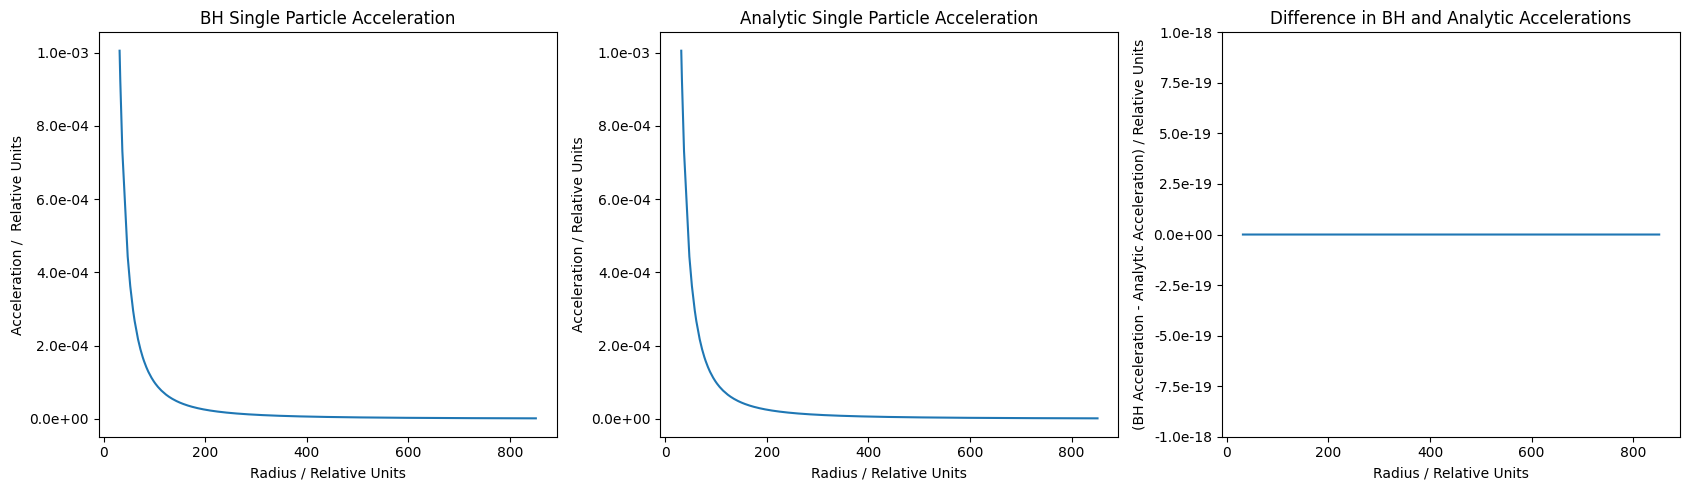

In [20]:
# Plot figures showing the BH particle accelerations, the analytic particle accelerations
# and the differences between them.
single_particle_fig, single_particle_axs = plt.subplots(1,3)
bh_results = util.calc_3D_results(bh_particles, single_particle_position, plotting=True, 
                                  fig=single_particle_fig, ax=single_particle_axs[0], 
                                  title="BH Single Particle Acceleration", 
                                  x_label="Radius / Relative Units", 
                                  y_label="Acceleration /  Relative Units", axis_label = "a")
analytic_results = util.calc_3D_results(analytic_particles, single_particle_position, 
                                        plotting=True, fig=single_particle_fig, 
                                        ax=single_particle_axs[1], title="Analytic Single Particle Acceleration", 
                                        x_label="Radius / Relative Units", y_label="Acceleration / Relative Units", 
                                        axis_label = "b")
bh_analytic_results = util.calc_3D_difference_results(bh_particles, analytic_particles, 
                                                      single_particle_position, True, fig=single_particle_fig, 
                                                      ax=single_particle_axs[2], y_range=[-1E-18, 1E-18], 
                                                      title="Difference in BH and Analytic Accelerations", 
                                                      x_label="Radius / Relative Units", 
                                                      y_label="(BH Acceleration - Analytic Acceleration) / Relative Units", 
                                                      axis_label = "c")
single_particle_fig.set_size_inches(17,5)
single_particle_fig.tight_layout()
plt.show()


### Many Massive Particles Simulation

In [8]:
# Initialise many massive particle simulation
n_particles = 5000
max_mass = 1
box_size = 1000
initial_positions = np.random.random((n_particles,3)) * box_size
initial_particles = []
for initial_position in initial_positions:
    initial_particles.append(Particle(initial_position, np.random.uniform(0,max_mass)))
centre_position = np.ones(3)*box_size/2

# Run direct simulation
direct_particles = copy.deepcopy(initial_particles)
direct_simulation = Direct(box_size, direct_particles)
direct_simulation.run_forces(plotting=False)

0
1000
2000
3000
4000
5000


In [11]:
# Run BH simulation
theta=0.5
bh_many_particles = copy.deepcopy(initial_particles)
bh_many_particle_simulation = BH(box_size, bh_many_particles, theta=theta)
bh_many_particle_simulation.run(single_particle_position, plotting=False)

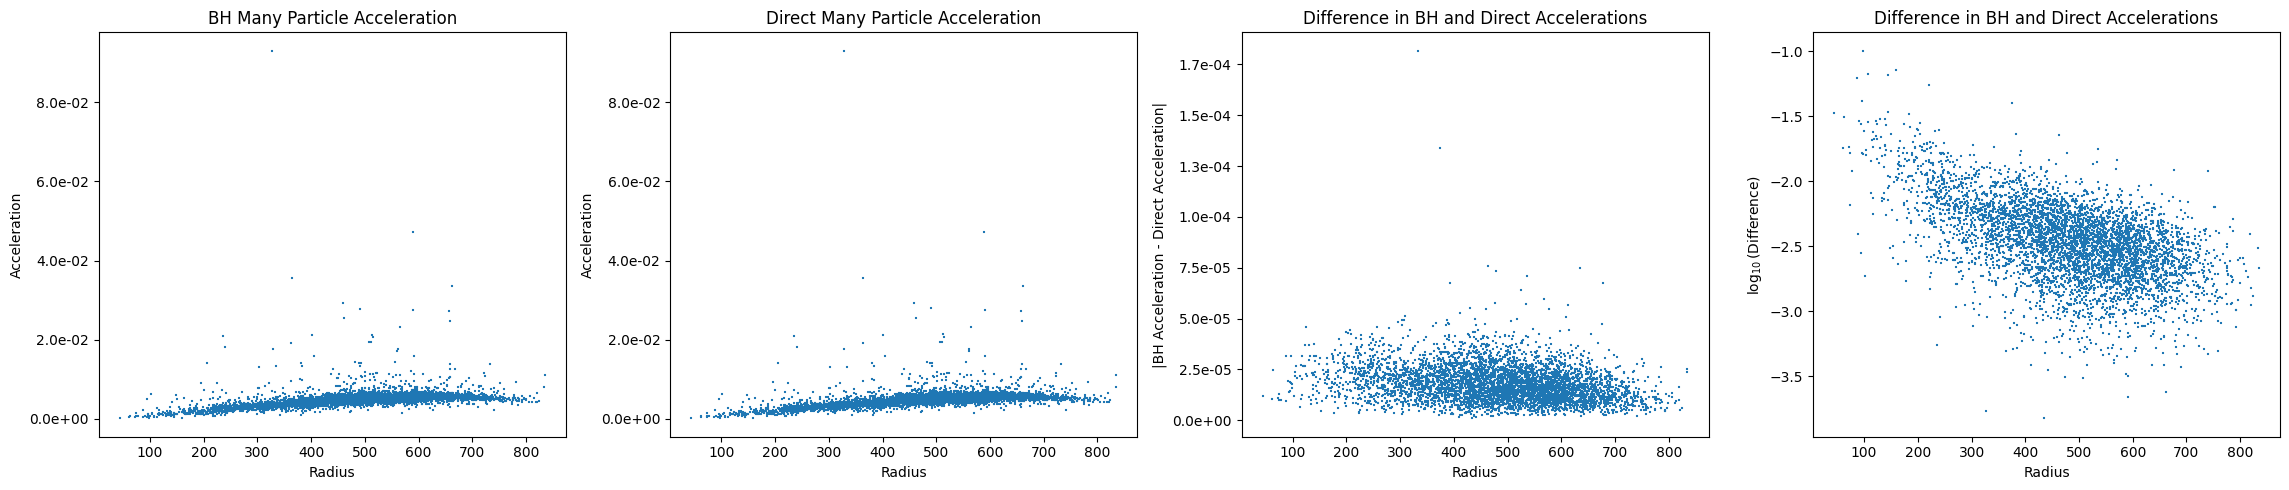

In [12]:
# Plot graphs showing the BH accelerations, the direct accelerations,
# the differences between these, and the logarithm of these differences
many_particle_fig, many_particle_axs = plt.subplots(1,4)
bh_many_results = util.calc_3D_results(bh_many_particles, centre_position, plotting=True, 
                                       scatter = True, marker_size = 1, format="+", 
                                       fig=many_particle_fig, ax=many_particle_axs[0], 
                                       title="BH Many Particle Acceleration", x_label="Radius", 
                                       y_label="Acceleration")
direct_many_results = util.calc_3D_results(direct_particles, centre_position, plotting=True, 
                                           scatter = True, marker_size = 1, format="+", 
                                           fig=many_particle_fig, ax=many_particle_axs[1], 
                                           title="Direct Many Particle Acceleration", x_label="Radius", 
                                           y_label="Acceleration")
bh_direct_results = util.calc_3D_difference_results(bh_many_particles, direct_particles, 
                                                    centre_position, True, scatter = True, 
                                                    marker_size = 1, format="+", fig=many_particle_fig, 
                                                    ax=many_particle_axs[2], 
                                                    title="Difference in BH and Direct Accelerations", 
                                                    x_label="Radius", 
                                                    y_label="|BH Acceleration - Direct Acceleration|")
log_bh_direct_results = util.calc_3D_relative_error_results(bh_many_particles, direct_particles, 
                                                            centre_position, True, scatter = True, 
                                                            marker_size = 1, format="+", fig=many_particle_fig,
                                                            ax=many_particle_axs[3], 
                                                            title="Difference in BH and Direct Accelerations", 
                                                            x_label="Radius", y_label=r"$\log_{10}(\text{Difference})$")

many_particle_fig.set_size_inches(23,5)
many_particle_fig.tight_layout()
plt.show()

### Increasing Accuracy

theta = 10
theta = 2
theta = 1.5
theta = 1.25
theta = 1
theta = 0.9
theta = 0.7
theta = 0.5
theta = 0.3


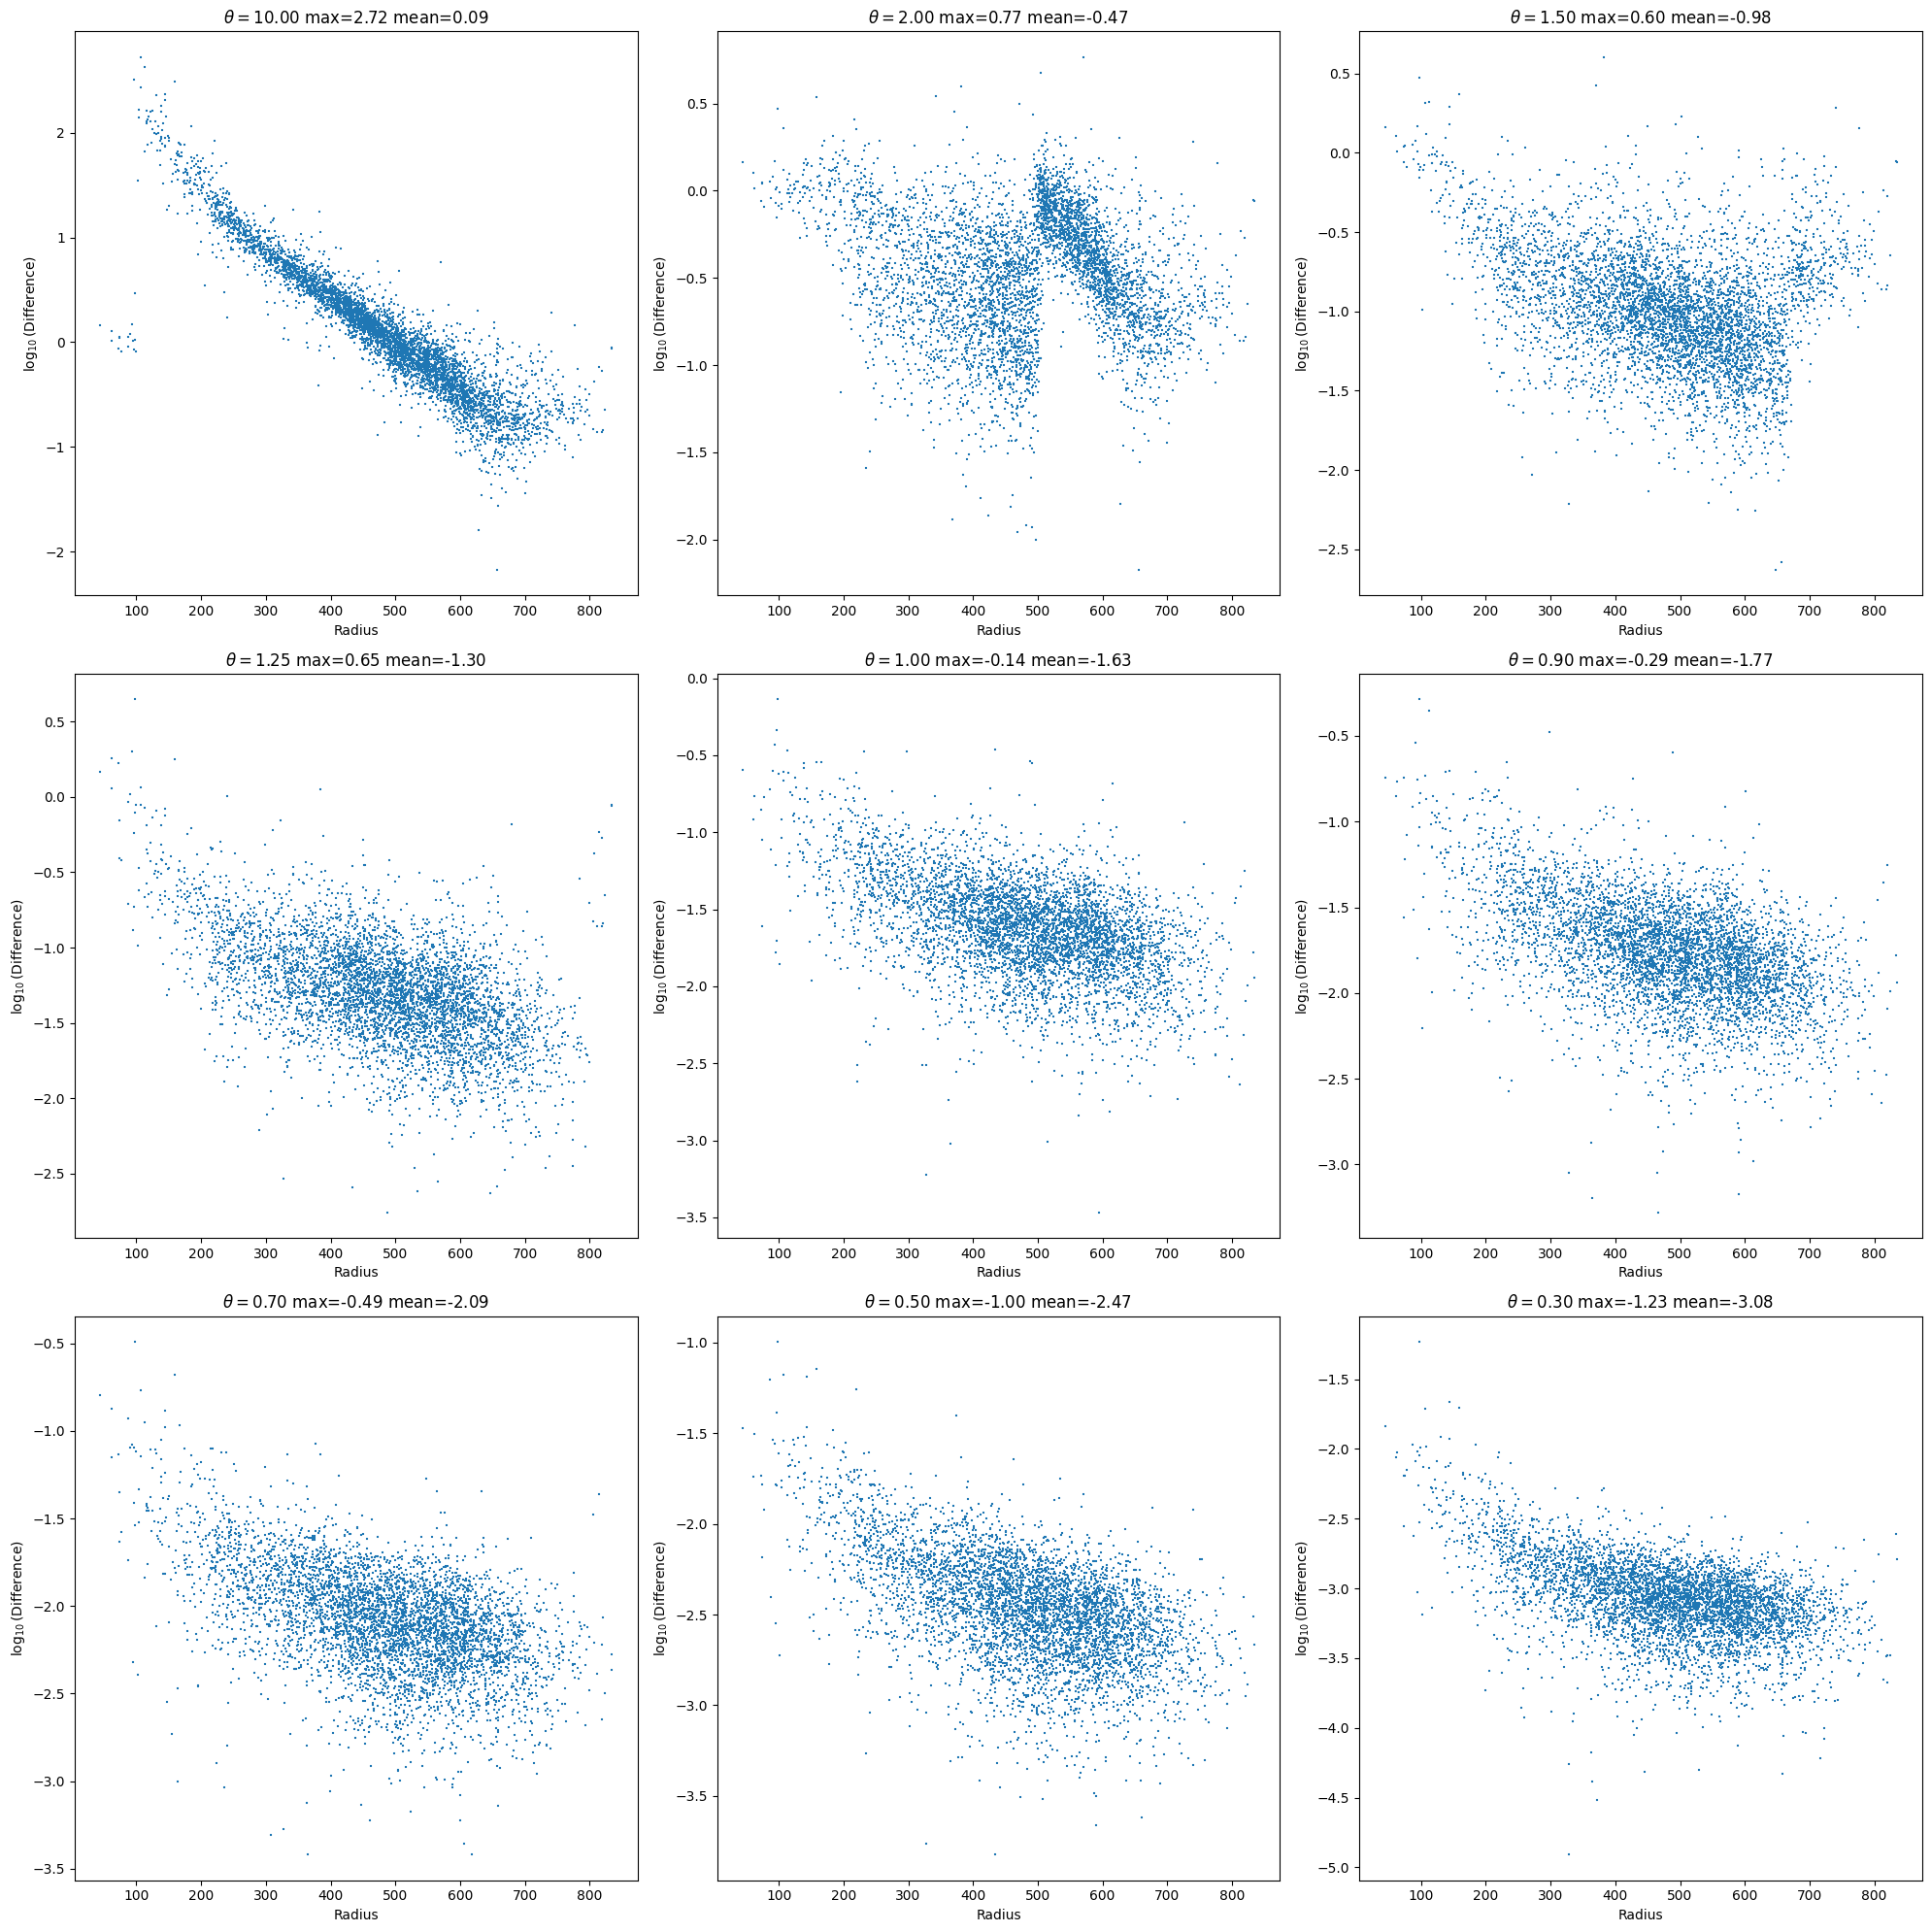

In [18]:
# Perform the same analysis as above, but display the log difference plots
# for a range of theta values
accuracy_fig, accuracy_axs = plt.subplots(3,3)
i = 0
for theta in [10,2,1.5,1.25,1,0.9,0.7,0.5,0.3]:
    print("theta = " + str(theta))
    bh_accuracy_particles = copy.deepcopy(initial_particles)
    bh_accuracy_particle_simulation = BH(box_size, bh_accuracy_particles, theta=theta)
    bh_accuracy_particle_simulation.run(single_particle_position, plotting=False)
    log_bh_direct_results = util.calc_3D_relative_error_results(bh_accuracy_particles, 
                                                                direct_particles, centre_position, 
                                                                True, scatter = True, marker_size = 1, 
                                                                format="+", fig=accuracy_fig, 
                                                                ax=accuracy_axs[int(i/3), i%3], 
                                                                x_label="Radius", y_label=r"$\log_{10}(\text{Difference})$")
    log_bh_direct_results.ax.set_title(r"$\theta=$" + '{0:.2f}'.format(theta) + 
                                       " max=" + '{0:.2f}'.format(log_bh_direct_results.max) + 
                                       " mean=" + '{0:.2f}'.format(log_bh_direct_results.mean))
    i += 1
accuracy_fig.set_size_inches(20,20)
accuracy_fig.tight_layout()
accuracy_fig
plt.show()